# Recommendation System

## Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import missingno
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('netflix_titles.csv.xls')

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.shape

(7787, 12)

Text(0.5, 1.0, 'VISUALIZATION OF MISSING VAUES')

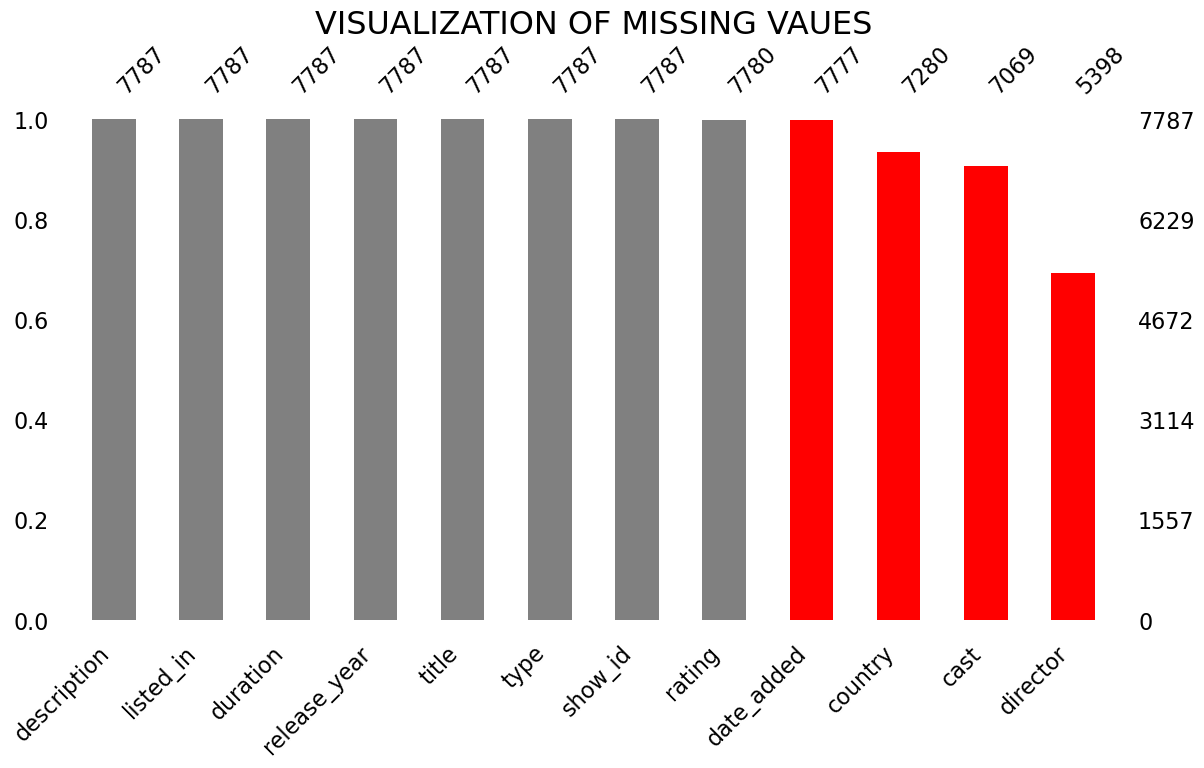

In [6]:
sns.set_context("poster")
color = ['grey','grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (13.5,6.5))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=23)

From above figure its visible that cast, country and director columns have considerable amount of null values 

### Preprocessing

In [7]:
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['date_added'] = pd.to_datetime(df['date_added'])
year = df['date_added'].apply(lambda x: x.year)
df['year'] = year
month = df['date_added'].apply(lambda x: x.dayofweek)
d = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
month = month.apply(lambda x : d[x])
df['week_added'] = month

month1 = df['date_added'].apply(lambda x: x.month)
c = {1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 
     7 : 'July', 8 : 'August', 9: 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
month1 = month1.apply(lambda x : c[x])
df['month_added'] = month1
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
genre           0
year            0
week_added      0
month_added     0
dtype: int64


In [8]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year,week_added,month_added
0,s1,TV Show,3%,NoDataAvailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows,2020,Friday,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas,2016,Friday,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Horror Movies,2018,Thursday,December


In [9]:
label= ["Movies","Tv Shows"]
fig = px.pie(labels=label,values=df['type'].value_counts(), names = label,width = 800, height = 600)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.4, 
                  marker = dict(colors = ['#ff6361','#1e434c','#ffa600'], line = dict(color = 'white', width = 5)))

fig.update_layout(annotations = [dict(text = 'Content Type', 
                                      x = 0.5, y = 0.5, font_size = 24, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)

# Analysis On Date Column 

In [10]:
df[df['type']=='Movie']['week_added'].value_counts()

Friday       1392
Thursday      848
Tuesday       785
Wednesday     727
Monday        600
Sunday        535
Saturday      490
Name: week_added, dtype: int64

In [11]:
df[df['type']=='TV Show']['week_added'].value_counts()

Friday       895
Wednesday    303
Thursday     299
Tuesday      285
Saturday     241
Monday       214
Sunday       173
Name: week_added, dtype: int64

In [12]:
data_dict3 = {'week_added': df.groupby('week_added').size().index,
             'n_content': df.groupby('week_added').size().values}

df_3 = pd.DataFrame(data=data_dict3, columns=['week_added', 'n_content'])

fig = px.line(df_3, x="week_added", y="n_content",
              title='Weekwise Conent Added',
              )

fig.update_layout(xaxis_title="Week Day",
                  yaxis_title="Number of content")

fig.show()

>1. Most of Conent is added on Friday.  
>2. Percentage of content on sunday is very low. 

In [13]:
R = df[df['type']=='Movie']['week_added'].value_counts()
S = df[df['type']=='TV Show']['week_added'].value_counts()
label1 = ['Friday','Thursday','Wednesday','Tuesday','Monday','Sunday','Saturday']
label2 = ['Friday','Wednesday','Tuesday','Thursday','Saturday','Monday','Sunday']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=R),
              1, 1)
fig.add_trace(go.Pie(labels=label2,values=S),
              1, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.55, hoverinfo="label+value+name",marker = dict(colors=['#8d230f','#ff6361','#ffa600','#bc5090'], line = dict(color = 'white', width = 2)))
fig.update_layout(
    title=dict(
        text='Movies and TV shows by weekday added',
        x=0.5,
        font=dict(
            size=30, 
            color='black')),
    
# Add annotations in the center of the donut pies.
annotations=[dict(text='TV Show', x=0.86, y=0.5, font_size=28, showarrow=False),
                 dict(text='Movie', x=0.17, y=0.5, font_size=28, showarrow=False)])
fig.show()

In [14]:
data_dict3 = {'year': df.groupby('year').size().index,
             'n_content': df.groupby('year').size().values}

df_3 = pd.DataFrame(data=data_dict3, columns=['year', 'n_content'])

fig = px.line(df_3, x="year", y="n_content",
              title='Conent Added Over the Years',
              )

fig.update_layout(xaxis_title="Year",
                  yaxis_title="Number of content")
fig.show()

In [15]:
Before2015 = df[df['year']<2015]['year'].sum()
tot = df['year'].sum()
After2015 = df[df['year']>=2015]['year'].sum()
print('Content Before 2015',Before2015)
print('Content After 2015',After2015)

Content Before 2015 114716
Content After 2015 15603307


In [16]:
print('Percentage of Content After 2015 is - ',(After2015/tot)*100)

Percentage of Content After 2015 is -  99.27016266613174


##   Out of total Content , More the 99% has been added After 2015.   
##   2019 was the year with Largest Content Addition.   
##   Sudden drop After 2019 can be seen due to Covid-19 pandemic.

In [17]:
df['month_added'].value_counts()

December     833
October      785
January      767
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: month_added, dtype: int64

Text(0.5, 1.0, 'MONTHLY ANALYSIS')

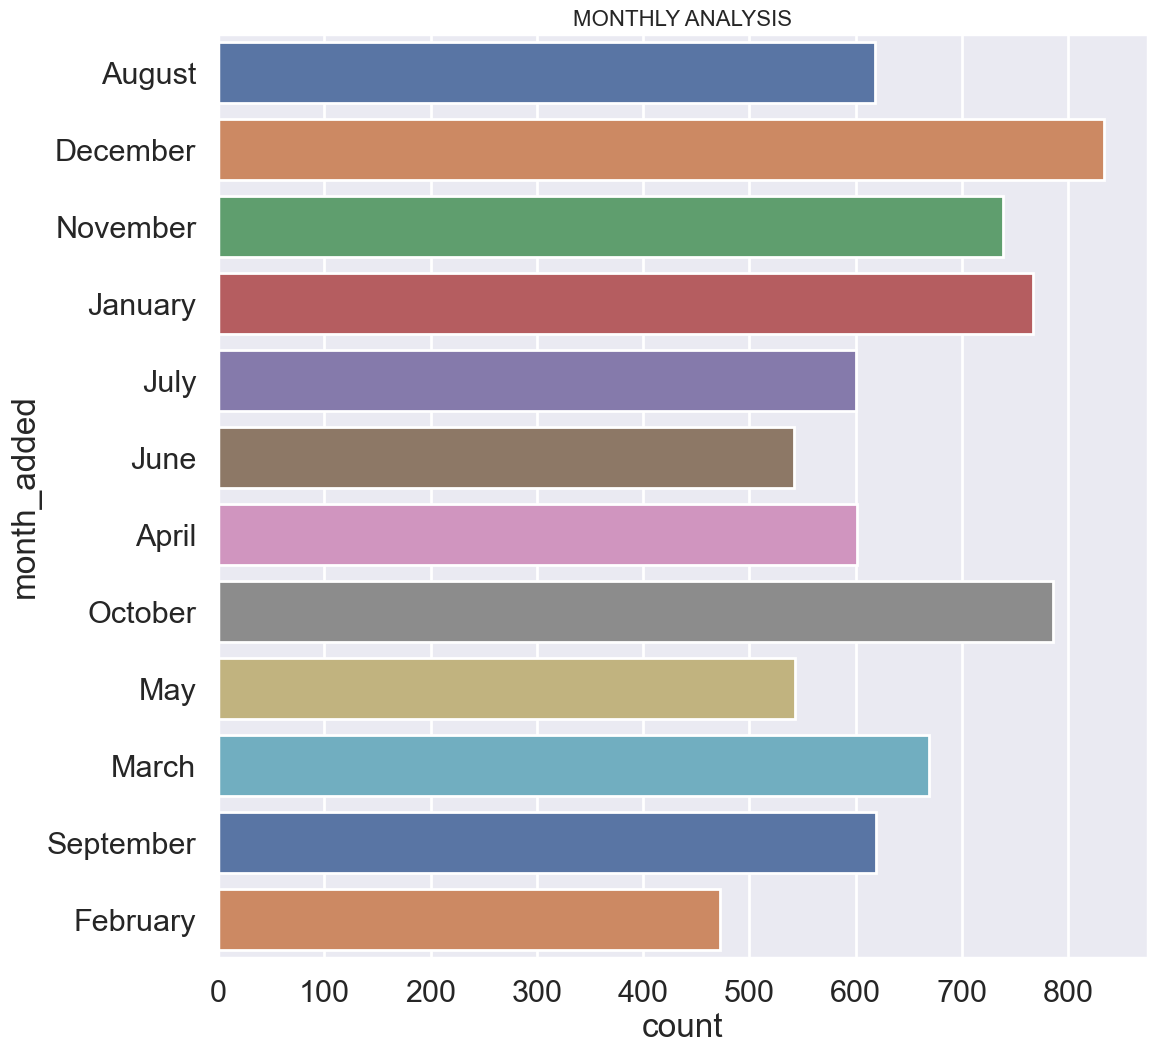

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
sns.countplot(y=df['month_added'],palette='deep')
plt.title("MONTHLY ANALYSIS",fontsize=16)

In [19]:
month_df_movies = df[df['type']=='Movie']['month_added'].value_counts().to_frame()
month_df_movies.reset_index(inplace=True)
month_df_movies.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

# month tv shows
month_df_tv_shows = df[df['type']=='TV Show']['month_added'].value_counts().to_frame()
month_df_tv_shows.reset_index(inplace=True)
month_df_tv_shows.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

sns.set_style('darkgrid')
fig = make_subplots(rows=1,cols=2, specs=[[{'type': 'xy'}, {'type': 'xy'}]],subplot_titles=('Movies', 'TV Shows'))

fig.add_trace(
go.Funnel(y=month_df_movies['Month'],x=month_df_movies['Count'], marker=dict( color='blue'),showlegend=False),row=1,col=1)
fig.add_trace(
go.Funnel(y=month_df_tv_shows['Month'],x=month_df_tv_shows['Count'], marker=dict( color='red'),showlegend=False),row=1,
col=2)
fig.update_layout(title=dict(text='Number of movies and TV Shows by month added',x=0.5,font=dict(size=20, color='black')))
fig.show()

### July and December are two most favourite of directors in terms of release.  

## Analysis on Country column 

Text(0.5, 1.0, 'Top Countries With Highest Number Of Movies And TV-Shows')

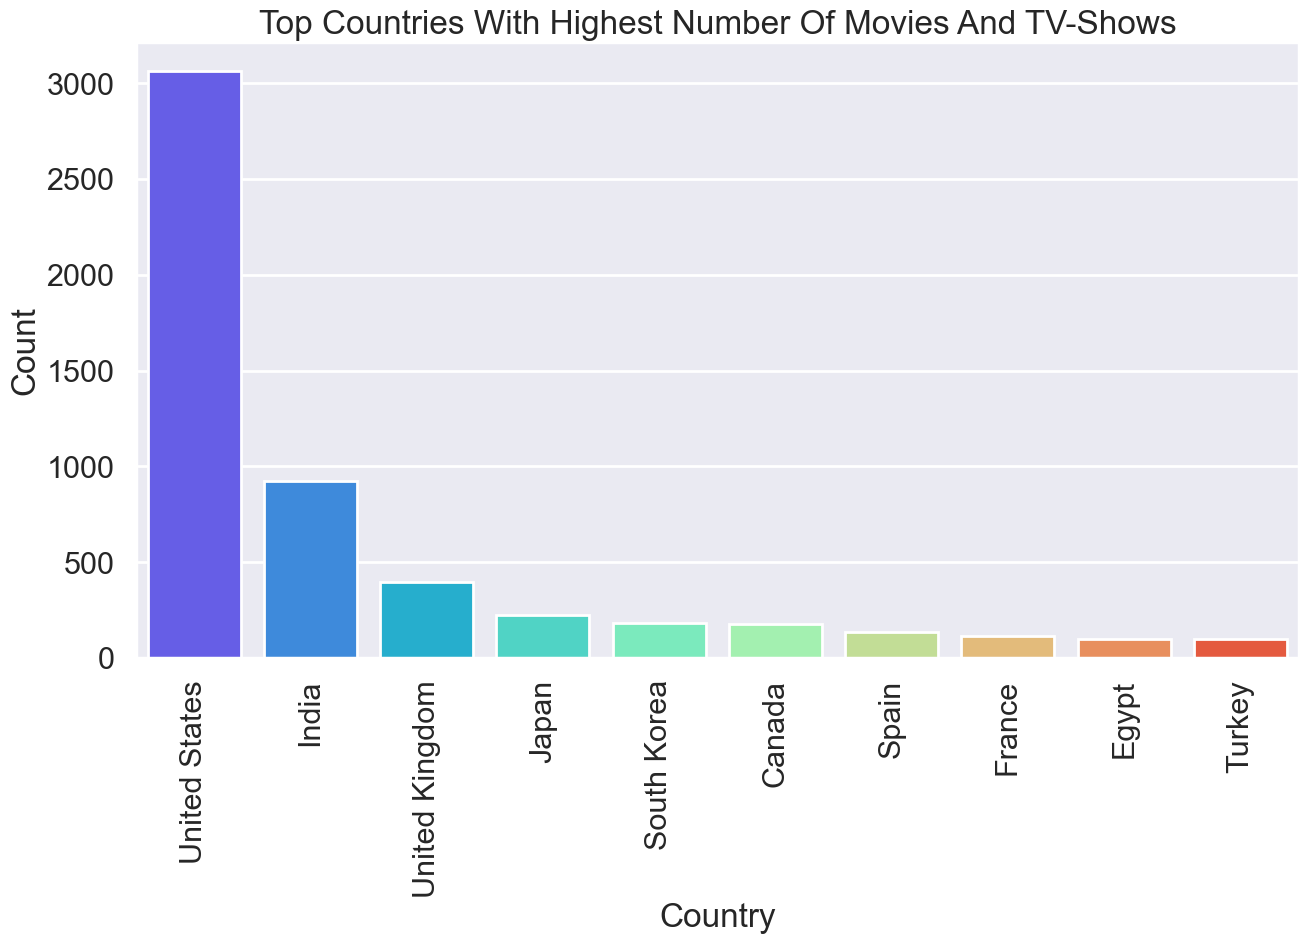

In [20]:
B = df['country'].value_counts()[:10]
B = B.reset_index()
B.columns = ['Country','Count']
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.barplot(x='Country',y='Count',data=B,palette="rainbow")
plt.xticks(rotation='vertical')
plt.title("Top Countries With Highest Number Of Movies And TV-Shows")

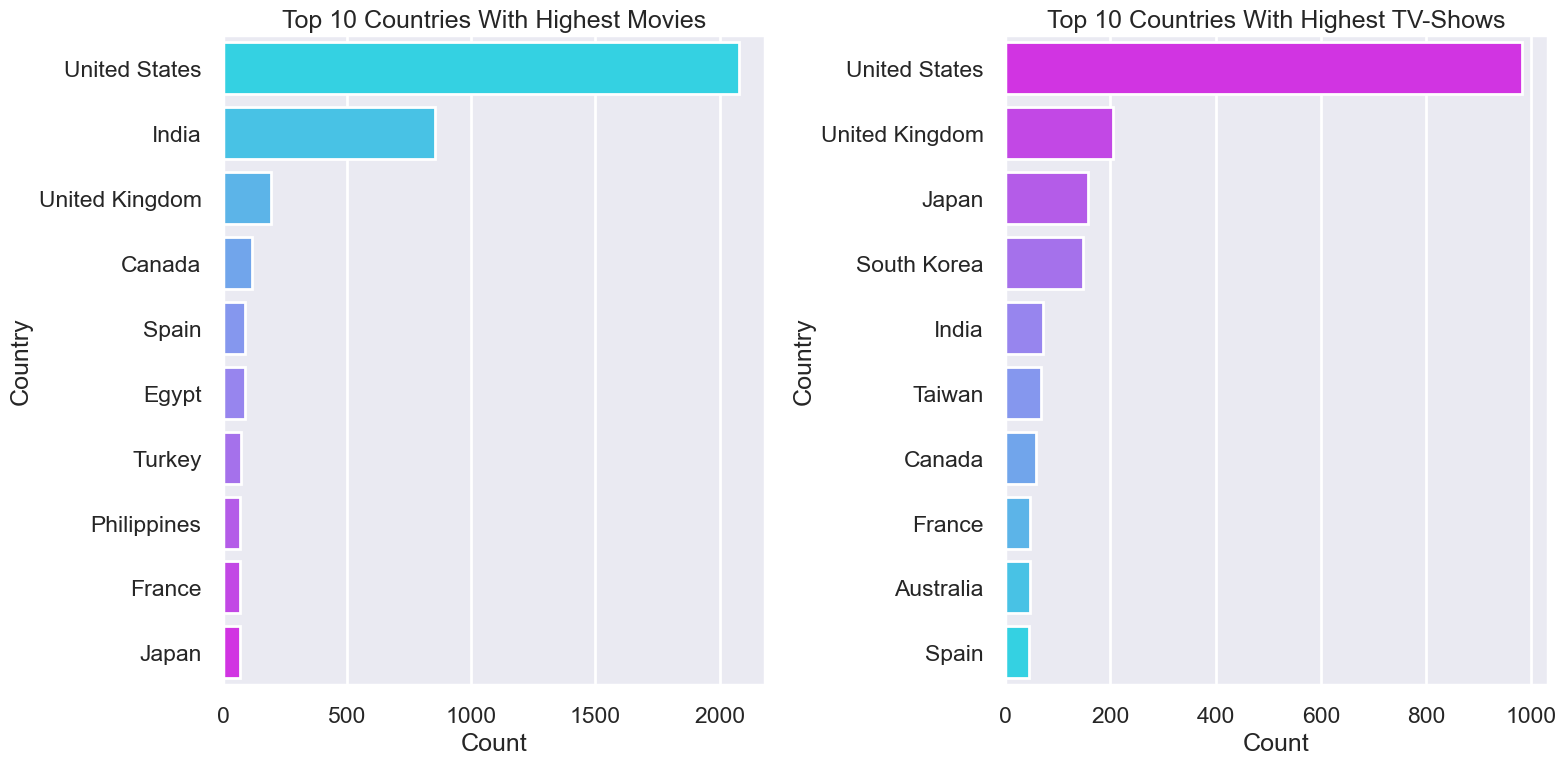

In [21]:
plt.figure(figsize=(16,8))
sns.set_context("poster", font_scale = .75)
sns.set_style('darkgrid')
A = df[df['type']=='Movie']['country'].value_counts()[:10]
A = A.reset_index()
A.columns=['Country','Count']
B = df[df['type']=='TV Show']['country'].value_counts()[:10]
B = B.reset_index()
B.columns=['Country','Count']


plt.subplot(121)
sns.barplot(y='Country',x='Count',data=A,palette="cool")
plt.title('Top 10 Countries With Highest Movies')
plt.subplot(122)
sns.barplot(y='Country',x='Count',data=B,palette="cool_r")
plt.title('Top 10 Countries With Highest TV-Shows')
plt.tight_layout()

## Analysis On Rating Column 

In [22]:
df_5 = pd.DataFrame(data=df.groupby('rating').size()).reset_index()
df_5 = df_5.loc[~df_5['rating'].isin(['66 min', '74 min', '84 min'])]
df_5 = df_5.rename(columns={0: 'Number of content'})

fig = px.pie(df_5, values='Number of content', names='rating',
             color_discrete_sequence=px.colors.sequential.RdBu, title='Ratings for all content on Netflix')

fig.update_traces(textposition='inside', textinfo='percent+label')

Text(0.5, 1.0, 'Type VS Rating')

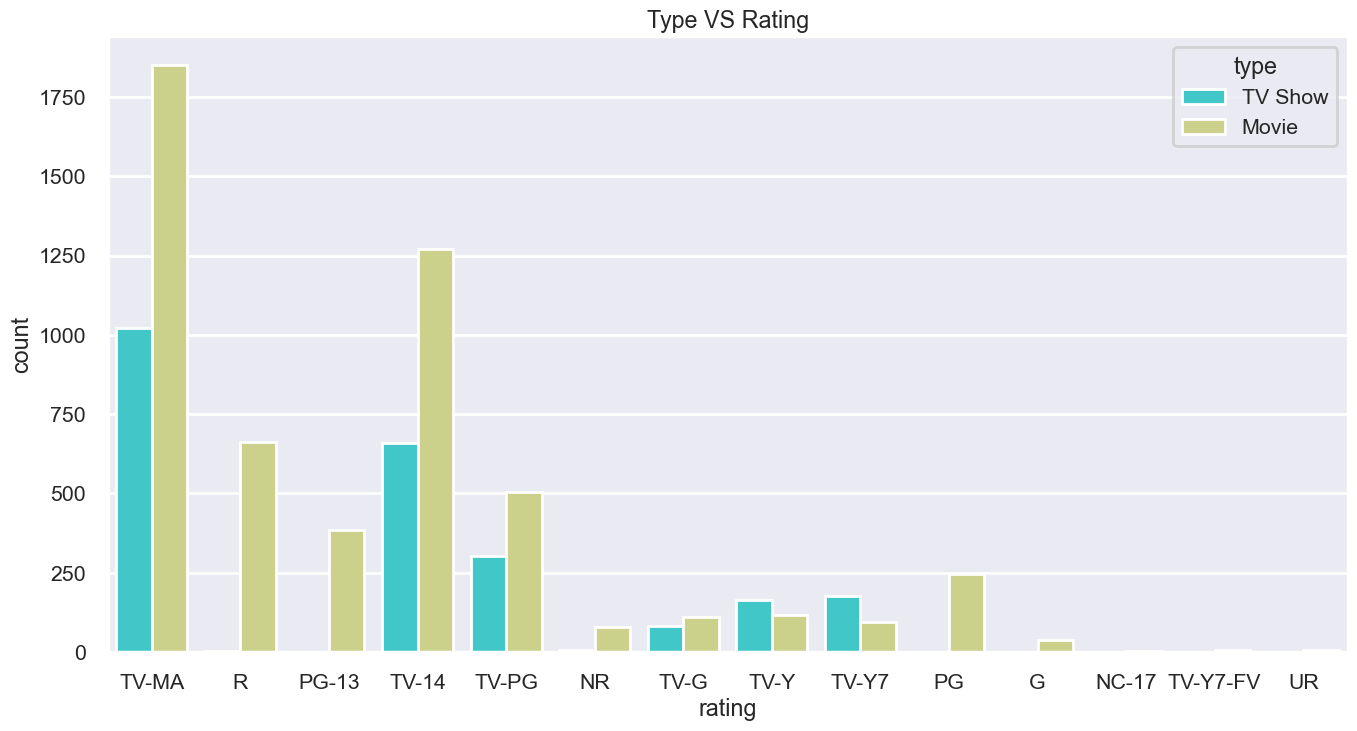

In [23]:
sns.set_context("poster", font_scale = .70)
plt.figure(figsize=(16,8))
sns.countplot(x = 'rating',data=df,hue='type',palette='rainbow')
plt.title('Type VS Rating')

>1. TV-MA is the highest rating 36%
>2. Most of the content is for Mature-Audience  in both Movies and TV Shows.  
>3. Then next higest is TV-14 with 24%.  

## Little Analysis On Duration Column

### TV Show, with Least Number of Seasons

In [24]:
bottom = df[df['type']=='TV Show'].sort_values(by=['duration'])
plt.figure(figsize=(9,6))
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['duration']],fill_color='lavender'))
                     ])

fig.show()

<Figure size 900x600 with 0 Axes>

## OLDEST TV Show

In [25]:
lef = df[df['type']=='TV Show'].sort_values(by=['release_year'])[:10]
plt.figure(figsize=(7,6))
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[lef['title'],lef['release_year']],fill_color='pink'))
                     ])
fig.show()

<Figure size 700x600 with 0 Axes>

## Newly Added TV SHOWS

In [26]:
le = df[df['type']=='TV Show'].sort_values(by=['release_year'],ascending=False)
plt.figure(figsize=(7,6))
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='grey'),
                 cells=dict(values=[le['title'],le['release_year']],fill_color='lightgreen'))
                     ])
fig.show()

<Figure size 700x600 with 0 Axes>

# Recommendation Part

## We need only these two column form above dataset for building the recommendation system.
1. Genre
2. Description

In [27]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year,week_added,month_added
0,s1,TV Show,3%,NoDataAvailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows,2020,Friday,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas,2016,Friday,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Horror Movies,2018,Thursday,December


In [28]:
expression_map = {'angry':['Stand-Up Comedy','Comedy'],'happy':['Action & Adventure','Horror Movies'],'suprised':['Thrillers','Horror Movies']
      ,'sad':['Romantic Movies','Romantic TV Shows'],'neutral':['Action & Adventure','Anime Series','Children & Family Movies',"Kids' TV"]
      ,'disgusted':['British TV Shows','Classic Movies','Anime Features']}

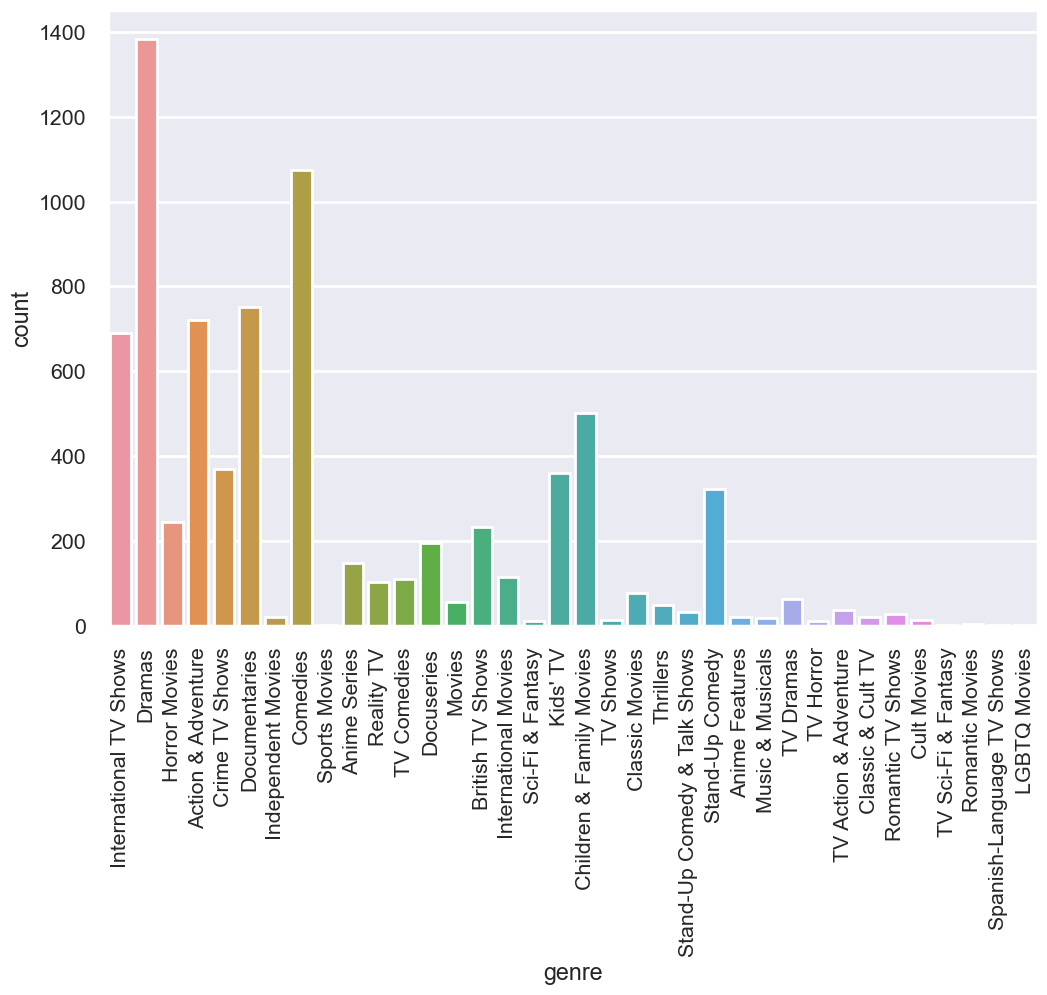

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['genre'])
plt.xticks(rotation=90)
plt.show()

In [30]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year,week_added,month_added,year_added,season_count
0,s1,TV Show,3%,NoDataAvailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows,2020,Friday,8,2020,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas,2016,Friday,12,2016,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Horror Movies,2018,Thursday,12,2018,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Action & Adventure,2017,Thursday,11,2017,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,Dramas,2020,Wednesday,1,2020,


In [31]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


In [32]:
import plotly.figure_factory as ff
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [33]:
from collections import Counter
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [34]:
small = df[df["type"] == "Movie"]
small = small[small["country"] == "India"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


C:\Users\shiva\AppData\Local\Temp\ipykernel_14892\918282102.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='release_year'>

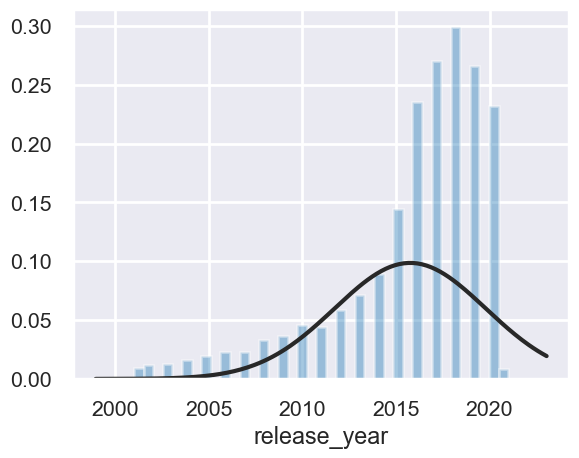

In [35]:
from scipy.stats import norm

sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

## **Module 2 (Emotion Detection)**

In [36]:
# pip install tensorflow

In [37]:
# pip install opencv-python

## Imports

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
train_dir = 'data/train'
val_dir = 'data/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Create Model

In [40]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

## Emotions will be displayed for the faces detected from the webcam feed

In [41]:
#load trained model
model.load_weights('model.h5')

# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

# dictionary mapping class labels with corresponding emotions
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
cap = cv2.VideoCapture(0)
limit=0
dominant_expression=[]
while True:
    # Capture frame
    ret, frame = cap.read()
    if not ret:
        break;
        
    # Find haar cascade to draw bounding box around face
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    print(emotion_dict[maxindex])
    limit+=1
    dominant_expression.append(emotion_dict[maxindex])
    cv2.imshow('Video', cv2.resize(frame,(500,500),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q') or limit>=100:
        break
        
cap.release()
cv2.destroyAllWindows()

print(dominant_expression)

1/1 [==============================] - 0s 333ms/step
Surprised
1/1 [==============================] - 0s 63ms/step
Surprised
1/1 [==============================] - 0s 58ms/step
Neutral
1/1 [==============================] - 0s 61ms/step
Neutral
1/1 [==============================] - 0s 55ms/step
Happy
1/1 [==============================] - 0s 62ms/step
Happy
1/1 [==============================] - 0s 49ms/step
Happy
1/1 [==============================] - 0s 63ms/step
Happy
1/1 [==============================] - 0s 45ms/step
Happy
1/1 [==============================] - 0s 61ms/step
Happy
1/1 [==============================] - 0s 64ms/step
Happy
1/1 [==============================] - 0s 53ms/step
Happy
1/1 [==============================] - 0s 63ms/step
Happy
1/1 [==============================] - 0s 63ms/step
Happy
1/1 [==============================] - 0s 47ms/step
Happy
1/1 [==============================] - 0s 47ms/step
Happy
1/1 [==============================] - 0s 49ms/step
Happy
1

In [42]:
from collections import Counter
expr={"Angry":0,"Disgusted":0,"Fearful":0,"Happy":0,"Neutral":0,"Sad":0,"Surprised":0}
for i in dominant_expression:
    expr[i]+=1
maxx=max(expr.values())
for j in expr:
    if expr[j]==maxx:
        final_expression=j
print("Final Emotion: ",final_expression)

Final Emotion:  Surprised


In [43]:
def Recommender(emotion,numbers):
  movies=pd.DataFrame({"Movie_Name":[],"emotion1":[]})
  preferred_genre=expression_map[emotion]
  for expression in preferred_genre:
    movies["Movie_Name"]+=df[df["genre"]==expression]

In [44]:
lst=df['listed_in']

In [45]:
pp={"Angry":'crime',"Disgusted":"Action","Fearful":"horror","Happy":"Comedy","Neutral":"Dramas", "Sad":"reality", "Surprised":"music"}

In [46]:
pp[final_expression]

'music'

In [47]:
new_df=pd.DataFrame({'title':[],'listed_in':[]})

In [48]:
lst=[]
n=0
for i in df['listed_in']:
    mapped_emotion=pp['Neutral']
    if mapped_emotion in i:
        newdf=df[['title','listed_in']][i==df['listed_in']]
        

In [49]:
print("Top 5 movies/TV shows related to your current mood are :")
newdf.head()

Top 5 movies/TV shows related to your current mood are :


,title,listed_in
273,Aashik Awara,"Dramas, International Movies, Music & Musicals"
278,ABCD 2,"Dramas, International Movies, Music & Musicals"
480,Amrapali,"Dramas, International Movies, Music & Musicals"
594,Asees,"Dramas, International Movies, Music & Musicals"
804,Been So Long,"Dramas, International Movies, Music & Musicals"


## Thank You